In [1]:
from IPython.display import Math
from IPython.display import Image 
import matplotlib.pyplot as plt
import numpy as np
from EA_tsp import *
from EA_ks import *

# CS 451: Computational Intelligence 
## Assignment 1: Evolutionary Algorithms 
## By: Muhammad Usaid Rehman & Abbas Haider 

## The Problems

### Travelling Salesperson Problem:
The TSP is an NP-hard problem that asks the question: Given a list of cities and the distances between the cities, what is the shortest possible route that visits each city exactly once and returns to the original city. A brute force algorithm for this problem runs in $O(n!)$ time. There are several approximation schema that bring this down to a polynomial time; however, they do not give exact solutions. We will implement an evolutionary algorithm to find an approximate TSP tour using minimization techniques.

### Knapsack Problem:
Knapsack is an NP-complete problem in combinatorial optimization. The problem states: Given a set of items, each with a weight and a value, determine the number of each item to include in a collection so that the total weight is less than or equal to a given limit and the total value is as large as possible. Similar to the TSP, there exist several approximation algorithms that approximate the solution to the problem to various degrees of accuracy. We will be implementing an evolutionary algorithm to find an approximate solution using maximization techniques. 

## Analysis of Evolutionary Algorithm
We will analyse the performance of evolutionary algorithm for both TSP and Knapsack by analyzing each combination of selection and survivor schema.

### Traveling Salesperson Problem:

#### Chromosome Representation:
A chromosome of a population in the TSP evolutionary algorithm is represented as a list of vertices, where a vertex represents each city. For example, in the 'qa194.tsp' dataset - a chromosome would look like this:



In [2]:
tsp_instance = tsplib95.load('wi29.tsp')
ex_population = init_tsp_pop(tsp_instance, 1)
print(ex_population[0])

[25, 3, 29, 18, 27, 12, 14, 13, 8, 1, 4, 22, 10, 26, 2, 28, 23, 24, 6, 21, 9, 16, 11, 20, 17, 19, 7, 15, 5]


#### Fitness Function:
Let us see the function that we use to check the fitness of a chromosome:
```
def fitness_tsp(chrom, tsp):
    fit = 0
    for i in range(len(chrom)-1):
        cost = tsp.get_weight(chrom[i], chrom[i+1])
        fit += cost
    return fit
```
When run, this function will output the cost of a TSP tour.

In [8]:
print(fitness_tsp(ex_population[0], tsp_instance))

114230


#### Evolutionary Algorithm: 
Our implementation of the EA takes several parameters:


1. `tsp` : An instance of the TSP problem using the TSP problem library `tsplib95`
2. `parent_sel` : A string representing the parent selection scheme to be implemented,<br> choices include: 
    - `"fps"` : Fitness proportional scheme.
    - `"rank"` : Rank based selection scheme.
    - `"rand"` : Random based selection scheme.
    - `"bintour"` : Binary tournament selection scheme. 
    - `"trunc"` : Truncation based elitism selection scheme.
3. `surv_sel` : A string representing the survivor selection scheme. It uses the same strings as `parent_sel`.
4. `num_gens` : The number of generations for which the algorithm will run. 
5. `num_offspring` : (Optional) The number of offspring that will be created in each generation. Default is 25. 
6. `p_m` : (Optional) The probability of mutation occuring for each chromosome. Defaults to 0.5.  
7. `pop_size` : (Optional) The size of the population for each generation. Default is 50. 




#### Numerical Analysis of the Algorithm:
We will compare the results of the algorithm using different combinations of selection and survivor schema. Here is a function we will use to invoke the algorithm for different schema. 

In [9]:
def run_EAtsp(tsp, parent_sel, surv_sel, num_gens, num_iter=10):
    bests = []
    avgs = []
    final_avg = [0]*num_gens
    best_avg = [0]*num_gens
    for i in range(num_iter):
        avg, best = EA_tsp(tsp, parent_sel, surv_sel, num_gens)
        bests.append(best)
        avgs.append(avg)
    for gen in range(num_gens):
        for j in range(num_iter):
            final_avg[gen] += avgs[j][gen]
            best_avg[gen] += bests[j][gen]
        final_avg[gen] = final_avg[gen] / num_iter
        best_avg[gen] = best_avg[gen] / num_iter 
    return final_avg, best_avg



A function that we will use to display plots: 

In [10]:
def plot_data_tsp(parent_sel, surv_sel, num_gens, label, tsp):
    avgvals, bestvals = run_EAtsp(tsp, parent_sel, surv_sel, num_gens)
    gens = [i+1 for i in range(num_gens)]
    plt.plot(gens, bestvals, label="BFS")
    plt.title(label)
    plt.plot(gens, avgvals, label="AFS")
    plt.legend(loc="upper right")
    plt.show()

Below are results of running the algorithm using a fitness proportional scheme for parent selection, and FPS, Random, and truncation based schema for survival selection;

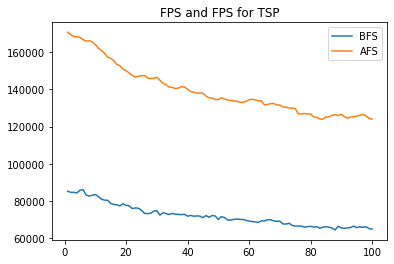

In [6]:
plot_data("fps", "fps", 100, "FPS and FPS for TSP", tsp_instance)

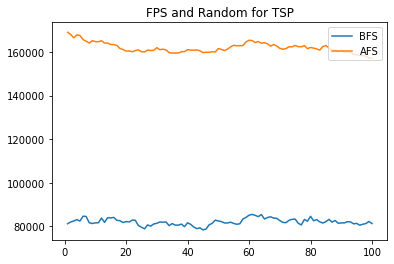

In [7]:
plot_data("fps", "rand", 100, "FPS and Random for TSP", tsp_instance) 

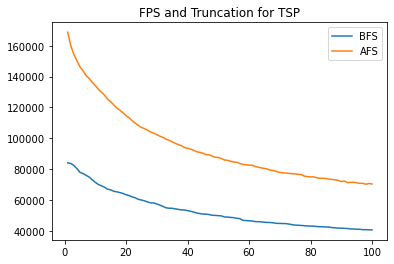

In [8]:
plot_data("fps", "trunc", 100, "FPS and Truncation for TSP", tsp_instance)

A plot displaying the results of running a binary tournament selection scheme, and a truncation based survivor scheme:

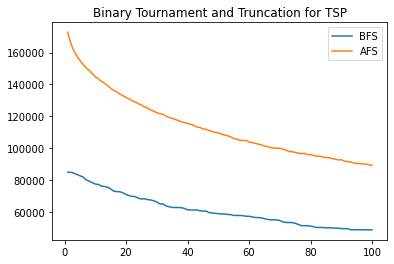

In [9]:
plot_data("bintour", "trunc", 100, "Binary Tournament and Truncation for TSP", tsp_instance)

Running truncation for both parent selection, and survivor selection:

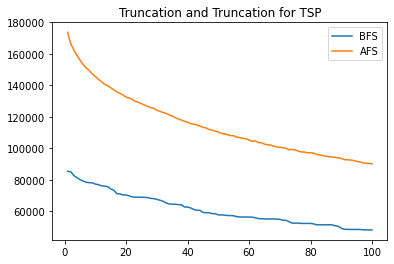

In [10]:
plot_data("trunc", "trunc", 100, "Truncation and Truncation for TSP", tsp_instance)

Running the EA on random parent selection scheme, with random and truncation survivor schema: 

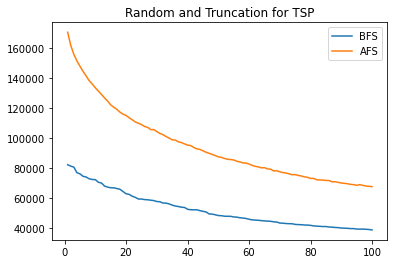

In [11]:
plot_data("rand", "trunc", 100, "Random and Truncation for TSP", tsp_instance)

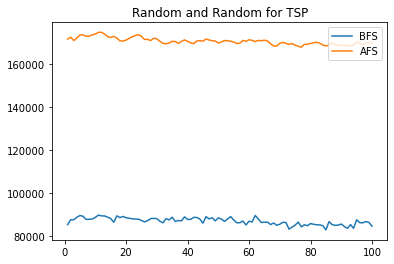

In [12]:
plot_data("rand", "rand", 100, "Random and Random for TSP", tsp_instance)

Running on Rank based parent selection, with truncation and binary tournament survivor selection scheme:

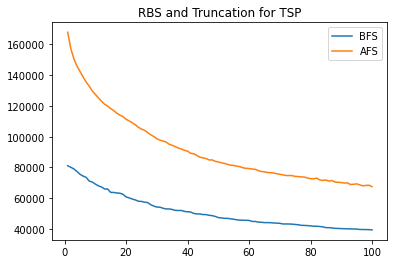

In [11]:
plot_data("rank", "trunc", 100, "RBS and Truncation for TSP", tsp_instance)

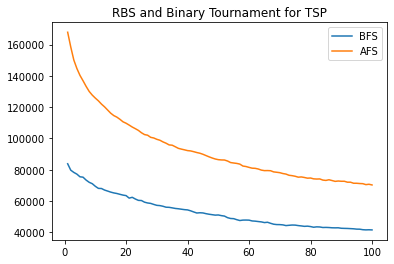

In [12]:
plot_data("rank", "bintour", 100, "RBS and Binary Tournament for TSP", tsp_instance)

#### Remarks:
Looking at the graphs, one can clearly see that survivor selection matters a lot. All schemes that used elitism as survivor strategy did much better compared to ones without. Rank based parent selection with truncation survivor selection worked best in our case. We would need to run these models on a higher number of generations to get more definitive results, however results do give us some insight about our algorithm. 

It is also interesting to see that survivor selection matters a lot. Wherever elitism strategy has been applied, the results have been better. On the other hand, random survivor selection does not work (and it also goes against the philosophy of the algorithm).

### The Knapsack Problem
#### Chromosome Representation:
A chromosome in the knapsack problem evolutionary algorithm is represented as a nested list. The zeroth index contains the total fitness value of that chromosome, whereas the first index holds a list of items with their respective weights. Here is an example of a single chromosome of the knapsack population:

In [2]:
s2 = "f2_l-d_kp_20_878"
max_weight, items = load_items_ks(s2)
pop = init_knpsk_pop(items, max_weight, 50)
print(pop[0])

[898, [[75, 92], [17, 96], [46, 4], [75, 14], [54, 44], [91, 84], [90, 43], [61, 25], [29, 48], [78, 32], [44, 92], [35, 82], [40, 18], [15, 83], [63, 58], [77, 56], [8, 6]]]


#### Fitness Function:
The fitness of each chromosome in the population is already stored in each list. Therefore, we simply have to access that element to view the fitness of a chromosome. 

```
def fitnesses_ks(pop):
    return [x[0] for x in pop]
```
A list of all the fitnesses of a population:

In [4]:
fits = fitnesses_ks(pop)
print(fits)

[851, 921, 858, 879, 892, 869, 842, 909, 906, 849, 921, 1024, 774, 859, 887, 820, 999, 875, 887, 778, 942, 935, 916, 921, 900, 958, 907, 944, 804, 816, 912, 887, 896, 848, 984, 948, 963, 760, 829, 829, 890, 876, 825, 856, 882, 919, 864, 872, 919, 958]


#### Evolutionary Algorithm:
The implementation of the Evolutionary algorithm takes the following parameters:

1. ```filename```: A string representing the filename from where data is to be read.   
2. ```generations```: The number of generations for which the EA would run. 
3. ```sparedChromos```: The number of chromosomes destined to survive each generation.
4. ```pop_size```: (Optional) The size of the population for each generation. Defaults to 50.
5. ```num_offspring```: (Optional) The number of offspring to be created in each generation. Defaults to 25. 
6. ```p_m```: (Optional) The probability of a mutation occuring for a chromosome. 
7. ```numOfMutations``` (Optional) The number of alleles changing in a chromosome in each mutation procedure. Default is 1. 

#### Numerical Analysis of the Algorithm:
Here is a function we will use to collect data for plotting:


In [3]:
def run_EAks(filename, num_gens, num_iter=10, parent_sel=None, surv_sel=None):
    bests = []
    avgs = []
    final_avg = [0]*num_gens
    best_avg = [0]*num_gens
    for i in range(num_iter):
        avg, best = EA_ks(filename, num_gens)
        bests.append(best)
        avgs.append(avg)
    for gen in range(num_gens):
        for j in range(num_iter):
            final_avg[gen] += avgs[j][gen]
            best_avg[gen] += bests[j][gen]
        final_avg[gen] = final_avg[gen] / num_iter
        best_avg[gen] = best_avg[gen] / num_iter 
    return final_avg, best_avg


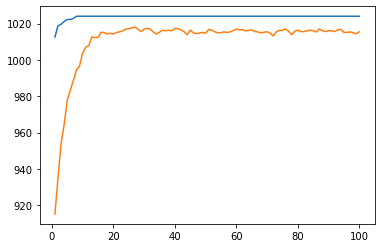

In [7]:
best_vals, avg_vals = run_EAks(s2, 100)
gens = [i+1 for i in range(100)]
plt.plot(gens, best_vals, label="BFS")
plt.plot(gens, avg_vals, label="AFS")
plt.show()